### Introduction
Abalones are marine gastropods whose age is traditionally determined by counting growth rings on their shells—a method requiring harming the animals. This project seeks to develop a non-invasive, ethical alternative by predicting abalone age through physical measurements. We aim to answer: "Can we accurately predict the age of abalone from physical measurements?"

Our approach utilizes the publicly available dataset 'abalone_data' containing measurements such as length, diameter, weight, and sex, alongside the age indicated by ring count. This dataset offers a foundation for applying our machine learning techniques to train a model that estimates an abalone's age based on its physical attribute.


In [14]:
library(tidyverse)
download_abalone <- download.file("https://archive.ics.uci.edu/static/public/1/abalone.zip", "abalone")
unzip_ <- unzip("abalone", files = "abalone.data", list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = ".", unzip = "internal",
      setTimes = FALSE)
abalone_data <- read_csv("./abalone.data", col_names = FALSE)
abalone_data <- rename(abalone_data, 
                       sex = X1,
                       length_mm = X2,
                       diameter_mm = X3,
                       height_mm = X4,
                       whole_weight_g = X5,
                       shucked_weight_g = X6,
                       viscera_weight_g = X7,
                       shell_weight_g = X8,
                       rings = X9)
abalone_data <- mutate(abalone_data, age_yrs = rings + 1.5)
abalone_data

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (8): X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,length_mm,diameter_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g,rings,age_yrs
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5


In [15]:
abalone_data <- select(abalone_data, length_mm, whole_weight_g, age_yrs)
abalone_data

length_mm,whole_weight_g,age_yrs
<dbl>,<dbl>,<dbl>
0.455,0.5140,16.5
0.350,0.2255,8.5
0.530,0.6770,10.5
0.440,0.5160,11.5
0.330,0.2050,8.5
0.425,0.3515,9.5
0.530,0.7775,21.5
0.545,0.7680,17.5
0.475,0.5095,10.5


### Methods
For our analysis we will only be using the length and whole weight of the abalone to predict it's age through use of regression, tested with accuracy. The length of an abalone is used in practice to determine maturity of the marine snail and the whole weight can be used to show growth, both of which are indicative of age. Using the length and whole weight of an abalone to predict age can be visualized through a scatter plot. 

In [16]:
library(tidymodels)
abalone_split <- initial_split(abalone_data, prop = 0.75, strata = age_yrs)
abalone_train <- training(abalone_split)
abalone_test <- testing(abalone_split)

abalone_age_proportions <- abalone_train |>
    group_by(age_yrs) |>
    summarize(n=n()) |>
    mutate(percent = 100*n/nrow(abalone_train))
abalone_age_proportions

age_yrs,n,percent
<dbl>,<int>,<dbl>
2.5,1,0.03193868
3.5,1,0.03193868
4.5,12,0.38326413
5.5,39,1.24560843
6.5,91,2.90641967
7.5,200,6.38773555
8.5,278,8.87895241
9.5,433,13.82944746
10.5,516,16.48035771


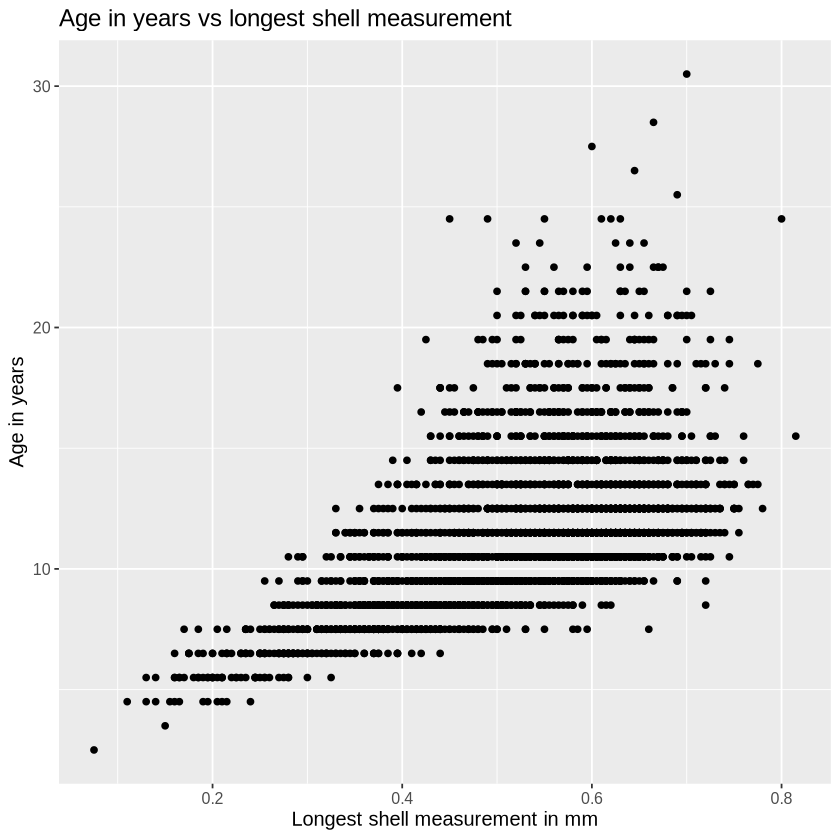

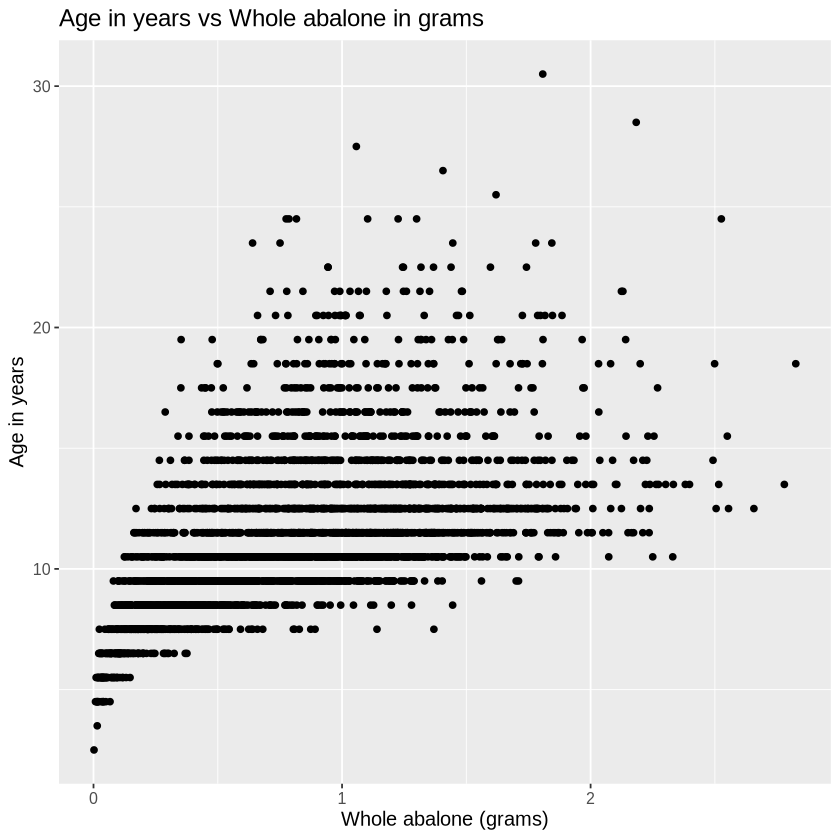

In [17]:
abalone_length_plot <- ggplot(abalone_train, aes(x = length_mm, y = age_yrs)) +
  geom_point() +
  labs(x= "Longest shell measurement in mm", y= "Age in years", 
       title= "Age in years vs longest shell measurement")+
  theme(text = element_text(size= 12),legend.position = "top",
        legend.direction = "vertical" )
abalone_length_plot

        

abalone_weight_plot <- ggplot(abalone_train, aes(x = whole_weight_g, y = age_yrs)) +
  geom_point() +
  labs(x= "Whole abalone (grams)", y= "Age in years", 
       title= "Age in years vs Whole abalone in grams")+
  theme(text = element_text(size= 12))
abalone_weight_plot

### Expected Outcomes and Significance
*What do you expect to find?*

We expect to create a predictive model that can accurately estimate the age of abalone based on the physical measurements such as length and weight.

*What impact could such findings have?*

The traditional process of determining abalone age such as cutting the shell, and manually counting the number of rings under microscope involves costs associated with equipment, labor, and time. By contrast, if age can be reliably predicted using physical measurements and predictive models, it would save a significant amount of time and the overall cost of age determination can be significantly reduced. Cutting the shell could damage the specimen, and it may not be feasible to sacrifice abalones for age determination especially in conservation efforts where preserving the population is crucial. Thus, by using physical measurements, it allows researchers to gather age data without harming the abalones. With a more efficient method for age determination, researchers and fisheries can monitor abalone populations more frequently in order to get better understanding of population dynamics, growth rates, and age structure, which are essential for more sustainable fisheries and conservation efforts.

*What future questions could this lead to?*

Additional factors beyond physical measurements, such as environmental variables like water temperature, pH levels, or food availability, might be added to improve the accuracy of age prediction models.
